# Adam Nathanson
# 21 February 2020
# Assignment 4

# (answers to the assigned questions are at the bottom)

# Instructions
The following Cells need to be executed.

They are used to download and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day. 

The assignment is in the last cell.

## This cell automatically downloads Capital Bikeshare data

### And here we read in the data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np
bikes = pd.read_csv('C:/Users/atoze/Documents/JHU Govt Analytics/Spring 2020/Machine Learning and Neural Networks//bikeshare.csv.gz')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)
bikes["dur"] = (bikes['Duration (ms)']/1000).astype(int)
bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,dur
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,301
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,557
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,555
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,766
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,139


In [2]:
bikes.dur.mean()

992.8716543657755

In [3]:
bikes.dur.std()

2073.9809135296514

In [4]:
bikes[bikes.dur>16000].shape

(973, 12)

In [5]:
plt.rcParams['figure.figsize'] = 20, 10

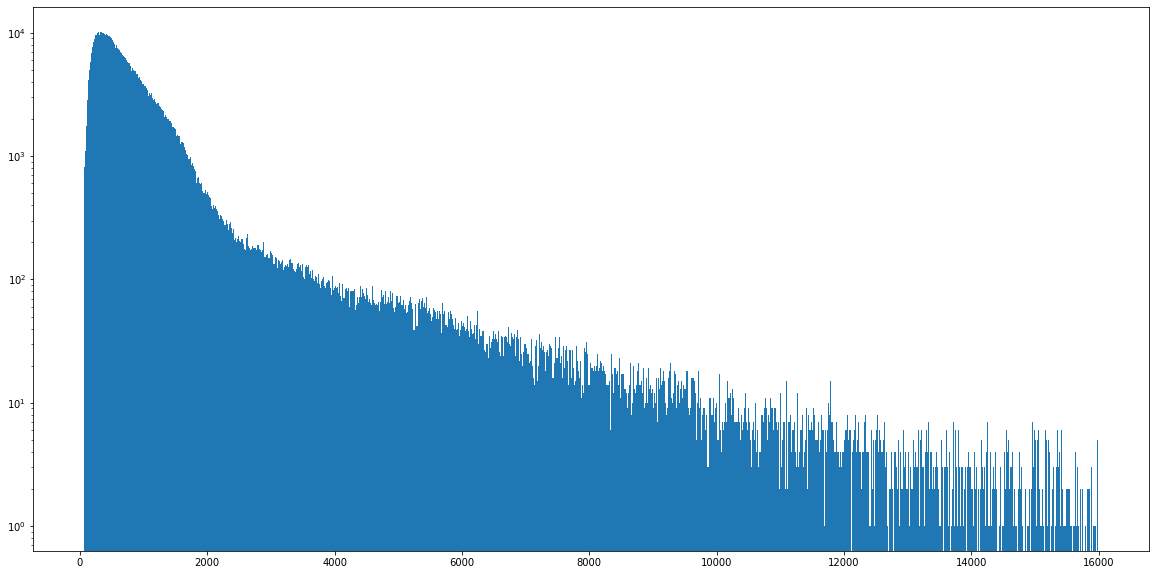

In [6]:
_=plt.hist(bikes[bikes.dur<16000].dur, log=True, bins=1000)

In [7]:
short = bikes[bikes.dur<16000]

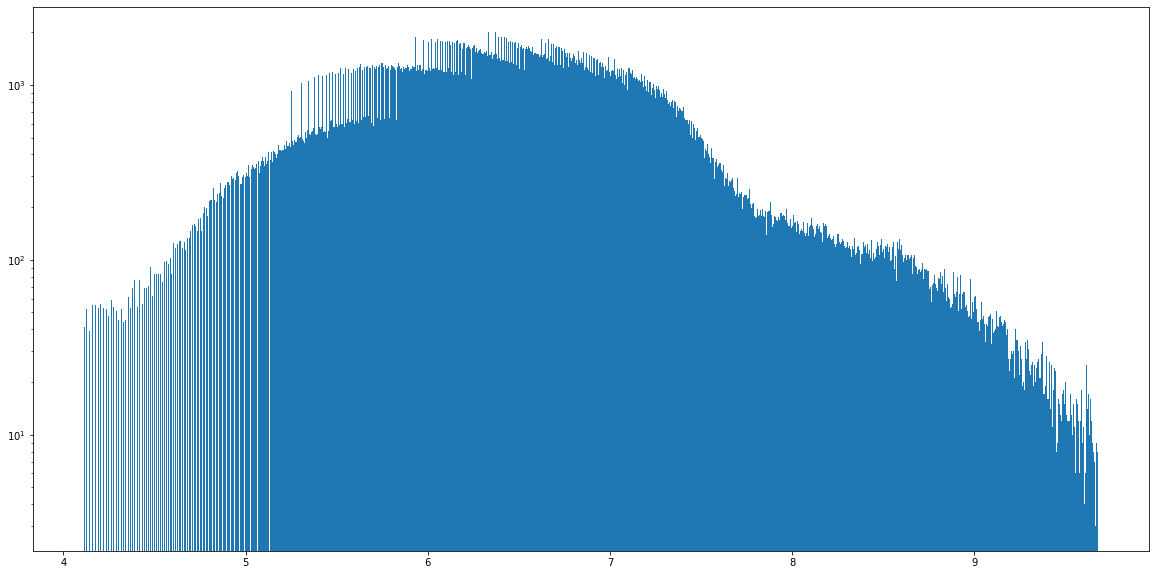

In [8]:
_=plt.hist(np.log1p(short.dur), log=True, bins=1000)

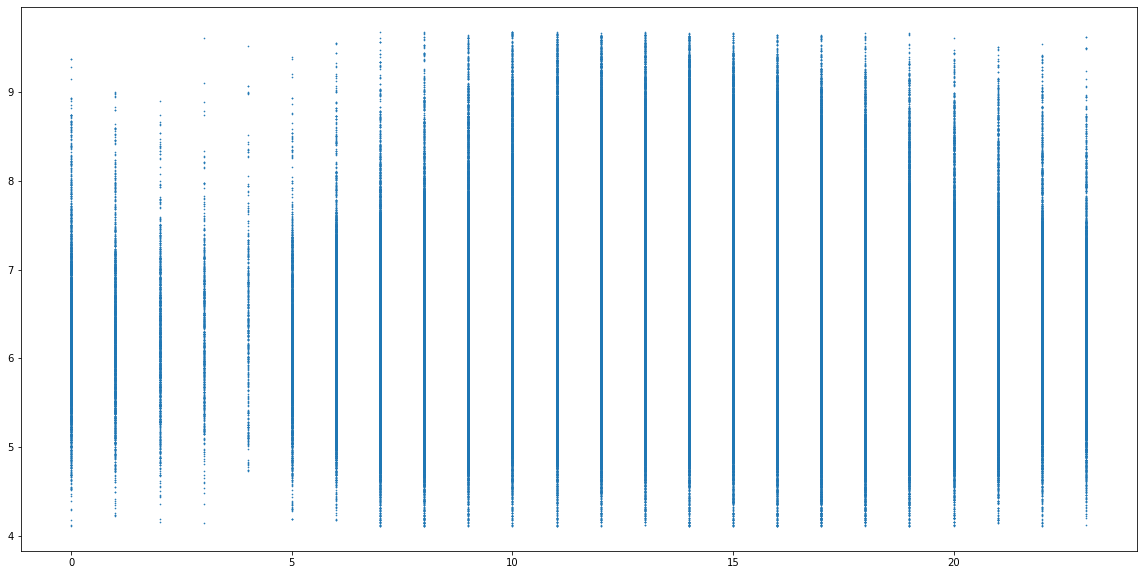

In [9]:
plt.scatter(short.start.dt.hour, np.log1p(short.dur), s=.4)

In [10]:
np.log1p(0), np.log(0)

C:\Users\atoze\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


(0.0, -inf)

In [11]:
bikes['log_dur'] = np.round(np.log1p(bikes.dur), 1)

In [12]:
monday = bikes[bikes.start.dt.dayofweek==0]

In [13]:
dur_hour = monday.groupby(['log_dur', monday.start.dt.hour]).count()

In [14]:
dur_hour

Duration (ms)  Start date  End date  Start station number  \
log_dur start                                                              
4.1     7                  1           1         1                     1   
        8                  4           4         4                     4   
        9                  1           1         1                     1   
        10                 2           2         2                     2   
        11                 1           1         1                     1   
...                      ...         ...       ...                   ...   
11.3    0                  1           1         1                     1   
        12                 1           1         1                     1   
        17                 2           2         2                     2   
        18                 1           1         1                     1   
        19                 1           1         1                     1   

               Start station  End station number  End station  Bike number  \
log_dur start                                                                
4.1     7                  1                   1            1            1   
        8                  4                   4            4            4   
        9                  1                   1            1            1   
        10                 2                   2            2            2   
        11                 1                   1            1            1   
...                      ...                 ...          ...          ...   
11.3    0                  1                   1            1            1   
        12                 1                   1            1            1   
        17                 2                   2            2            2   
        18                 1                   1            1            1   
        19                 1                   1            1            1   

               Member Type  start  end  dur  
log_dur start                                
4.1     7                1      1    1    1  
        8                4      4    4    4  
        9                1      1    1    1  
        10               2      2    2    2  
        11               1      1    1    1  
...                    ...    ...  ...  ...  
11.3    0                1      1    1    1  
        12               1      1    1    1  
        17               2      2    2    2  
        18               1      1    1    1  
        19               1      1    1    1  

[1153 rows x 12 columns]

In [15]:
duration_hour = dur_hour.start.unstack().T.fillna(0)
duration_hour

log_dur,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,...,10.4,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3
start,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,3.0,2.0,0.0,0.0,3.0,13.0,7.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,1.0,3.0,4.0,7.0,19.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,5.0,3.0,2.0,7.0,7.0,15.0,27.0,45.0,45.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,5.0,3.0,4.0,5.0,12.0,26.0,32.0,59.0,77.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


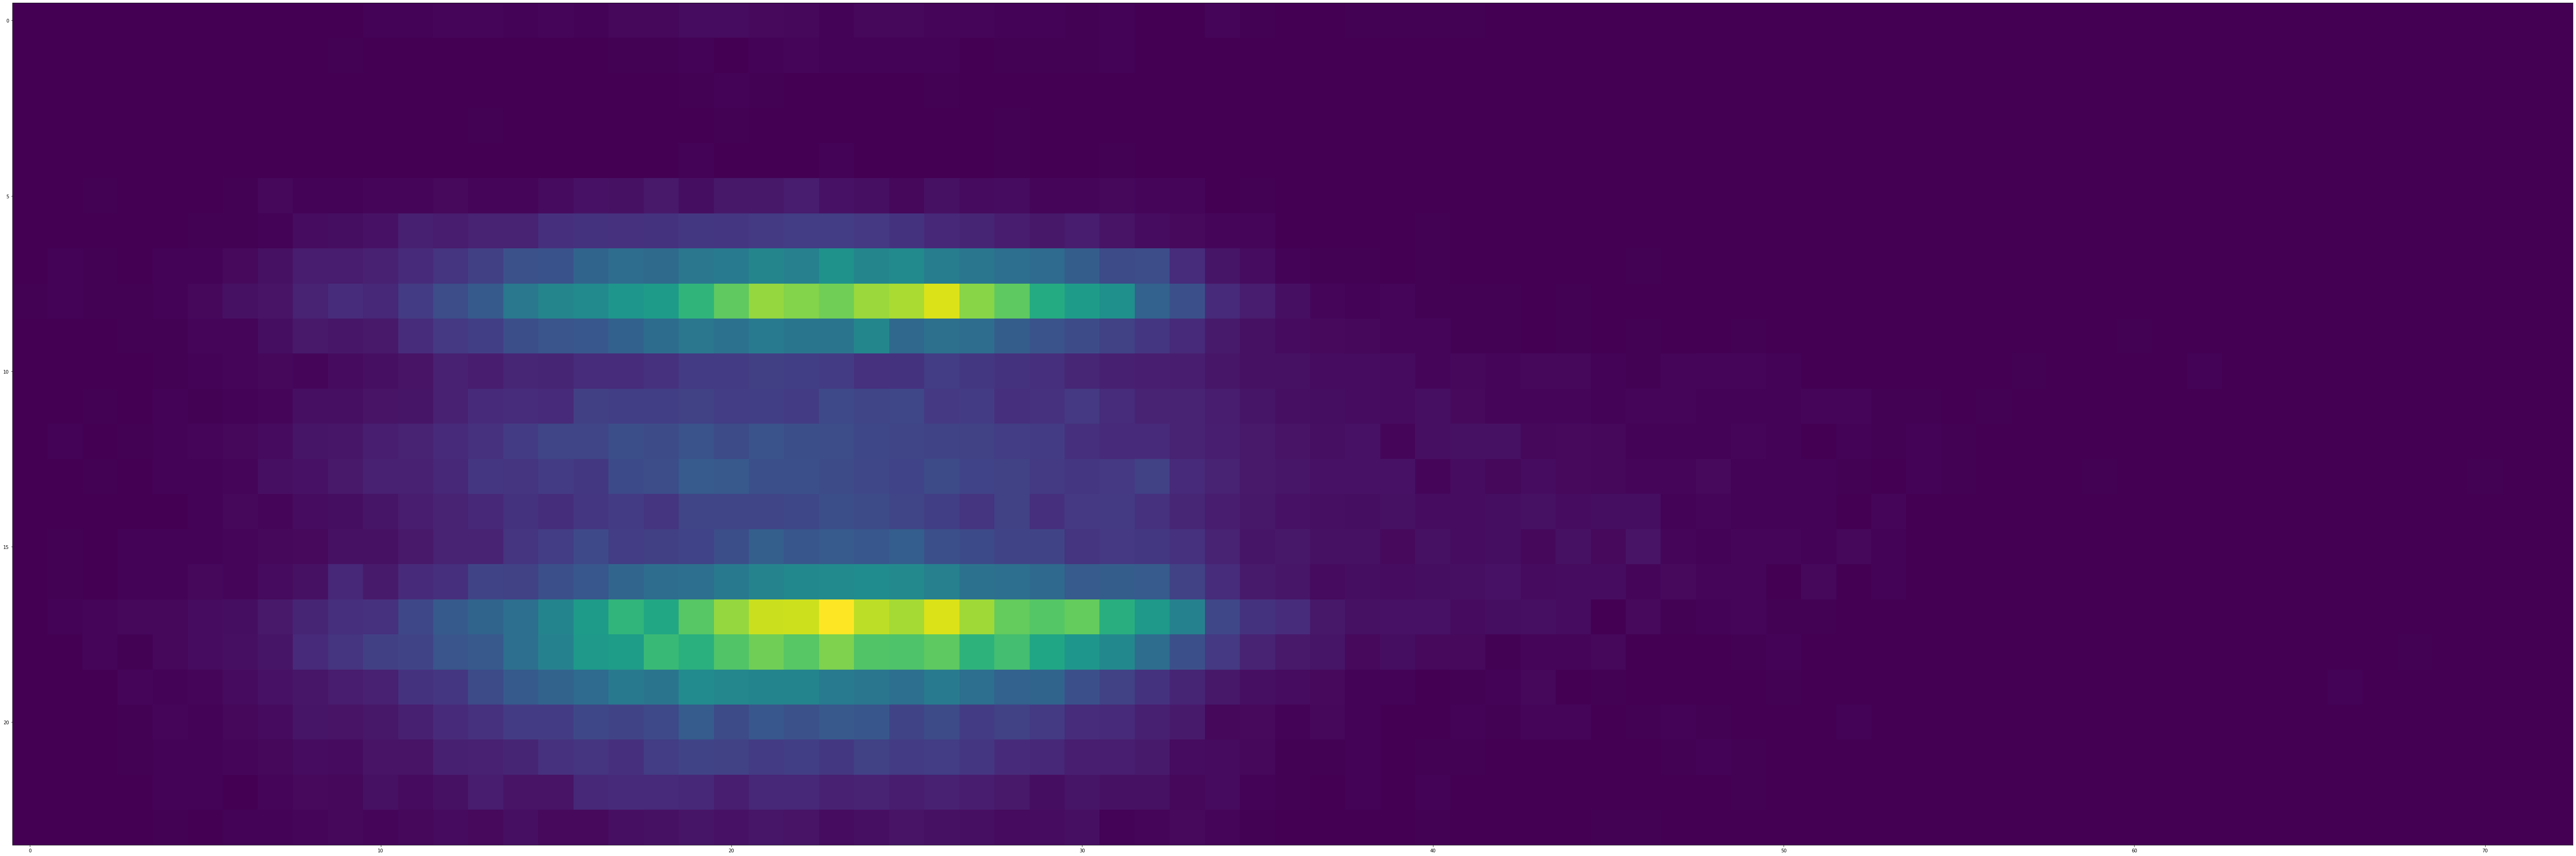

In [16]:
plt.figure(figsize=(100,100))
plt.imshow(duration_hour)

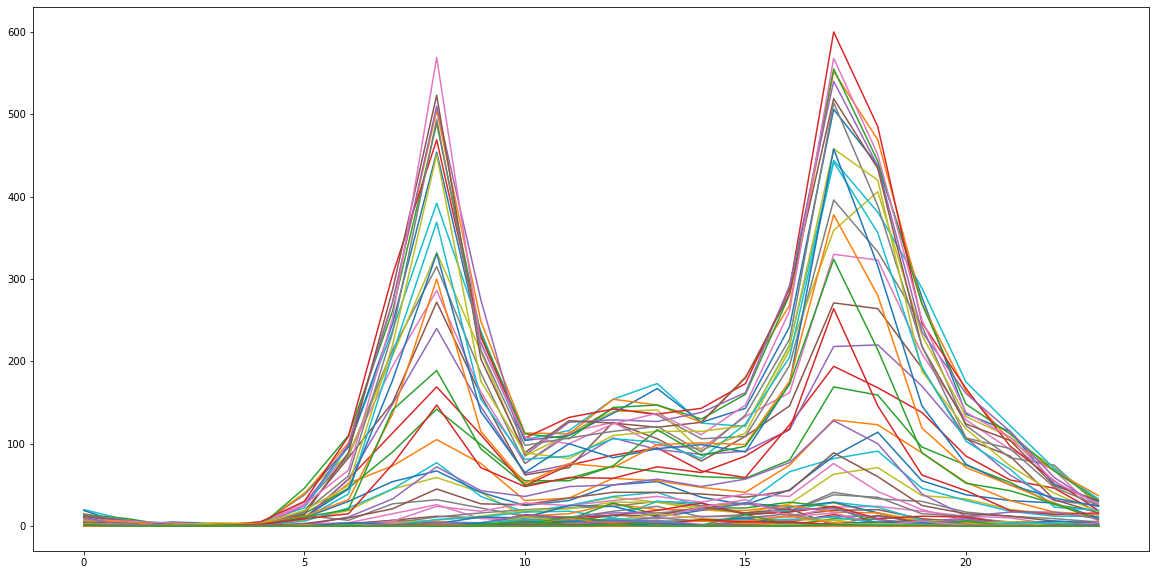

In [17]:
_=plt.plot(duration_hour)

In [18]:
bikes['Member Type'].value_counts()

Registered    467432
Casual         84967
Name: Member Type, dtype: int64

### Create a new column that represents the hour+minute of the day as a fraction (i.e. 1:30pm = 13.5)

In [19]:
np.round(.65, 1)

0.6

In [20]:
37//6, (37//6)/10, 37/60

(6, 0.6, 0.6166666666666667)

In [21]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute//6)/10)

In [22]:
bikes['roundhour_of_day'] = (bikes.start.dt.hour ) # keep the hour handy as well

### Aggregate to get a count per hour/minute of the day across all trips

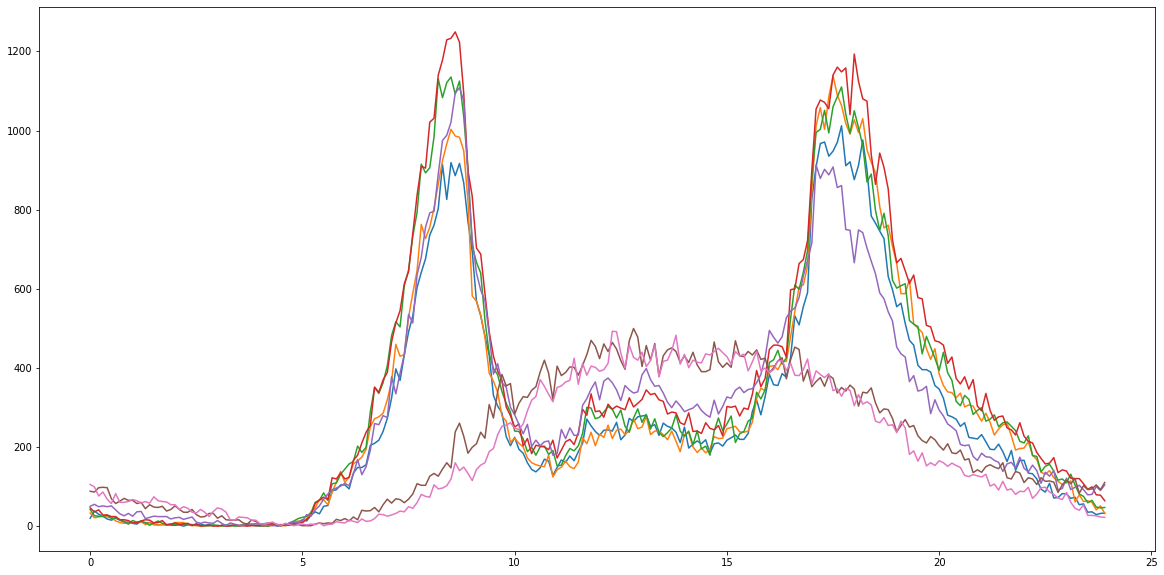

In [23]:
reg_bikes = bikes[bikes['Member Type']=='Registered']
hours = reg_bikes.groupby([reg_bikes.hour_of_day, reg_bikes.start.dt.dayofweek]).agg('count')
hours['hour'] = hours.index
day_hour_count = hours.dur.unstack()
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count[0])
plt.plot(day_hour_count.index, day_hour_count[1])
plt.plot(day_hour_count.index, day_hour_count[2])
plt.plot(day_hour_count.index, day_hour_count[3])
plt.plot(day_hour_count.index, day_hour_count[4])
plt.plot(day_hour_count.index, day_hour_count[5])
plt.plot(day_hour_count.index, day_hour_count[6])

In [24]:
day_hour_count

start,0,1,2,3,4,5,6
hour_of_day,,,,,,,
0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...
23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0


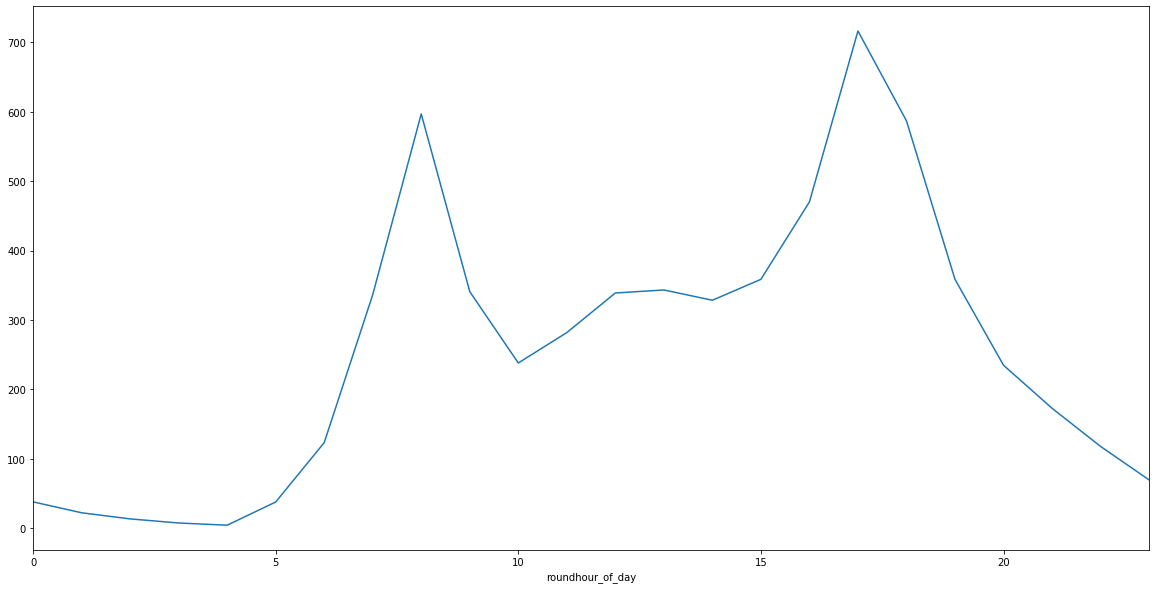

In [25]:
hoursn = bikes.groupby('roundhour_of_day').agg('count')
hoursn['hour'] = hoursn.index
(hoursn.start/90).plot() # 90 days in a quarter

In [26]:
hour_count = bikes.groupby(bikes.start.dt.dayofyear*24 + bikes.start.dt.hour).count()

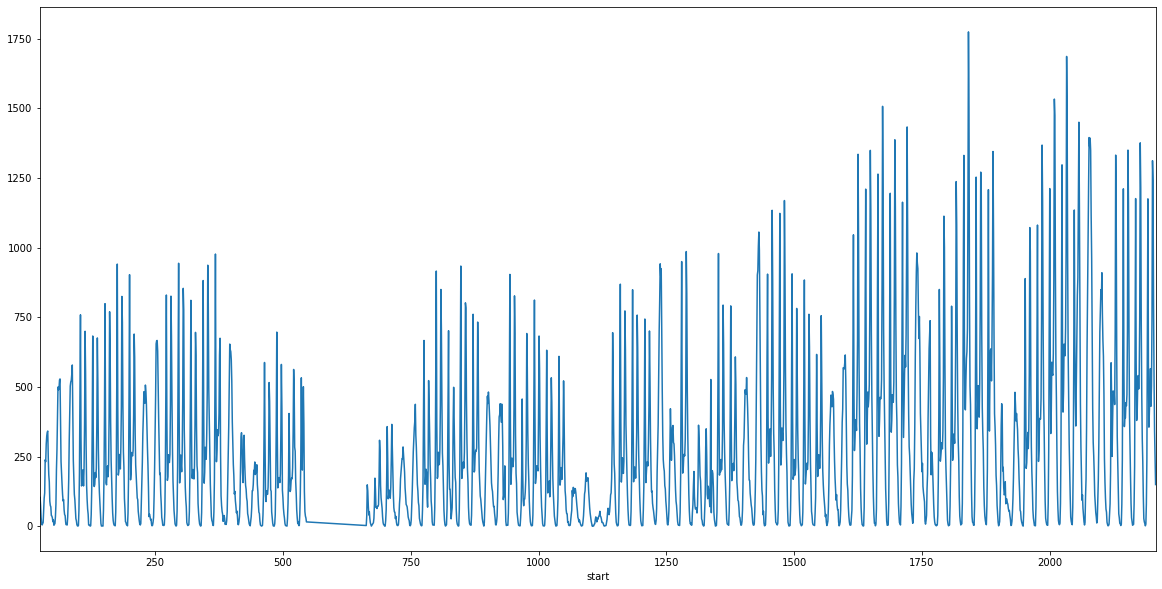

In [27]:
plt.figure(figsize=(20,10))
hour_count.start.plot()

In [28]:
day_count = bikes.groupby(bikes.start.dt.dayofyear).count()

In [29]:
day_hour = bikes.groupby([bikes.start.dt.dayofyear, bikes.start.dt.hour]).count()

In [30]:
day_hour.start.unstack()

start,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start,,,,,,,,,,,,,,,,,,,,,
1,56.0,105.0,74.0,32.0,13.0,5.0,10.0,14.0,54.0,101.0,...,324.0,338.0,342.0,247.0,185.0,160.0,90.0,75.0,70.0,39.0
2,37.0,31.0,17.0,23.0,4.0,7.0,10.0,34.0,80.0,203.0,...,495.0,525.0,529.0,392.0,232.0,188.0,150.0,114.0,91.0,96.0
3,59.0,42.0,39.0,15.0,6.0,9.0,5.0,33.0,87.0,168.0,...,524.0,546.0,579.0,398.0,237.0,172.0,115.0,96.0,64.0,28.0
4,20.0,6.0,2.0,1.0,3.0,58.0,192.0,468.0,759.0,321.0,...,145.0,206.0,365.0,700.0,547.0,293.0,146.0,96.0,62.0,44.0
5,5.0,5.0,3.0,1.0,2.0,42.0,131.0,363.0,683.0,329.0,...,175.0,208.0,365.0,676.0,519.0,279.0,178.0,122.0,86.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,113.0,82.0,50.0,34.0,12.0,24.0,94.0,166.0,297.0,509.0,...,910.0,761.0,667.0,611.0,475.0,243.0,158.0,101.0,62.0,51.0
88,15.0,7.0,2.0,3.0,8.0,42.0,81.0,197.0,587.0,464.0,...,481.0,437.0,696.0,1332.0,1113.0,620.0,324.0,226.0,148.0,45.0
89,31.0,11.0,9.0,3.0,8.0,79.0,240.0,727.0,1211.0,564.0,...,433.0,473.0,700.0,1350.0,1159.0,700.0,400.0,279.0,178.0,82.0


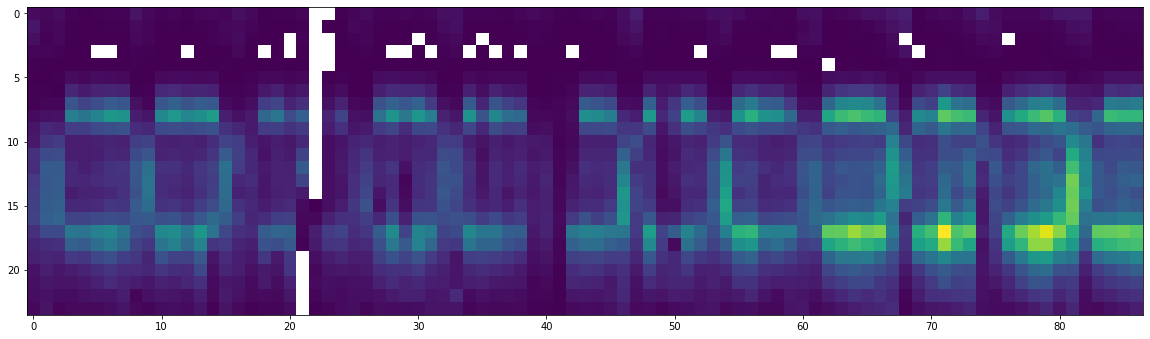

In [31]:
plt.figure(figsize=(20,10))
plt.imshow(day_hour.start.unstack().T)

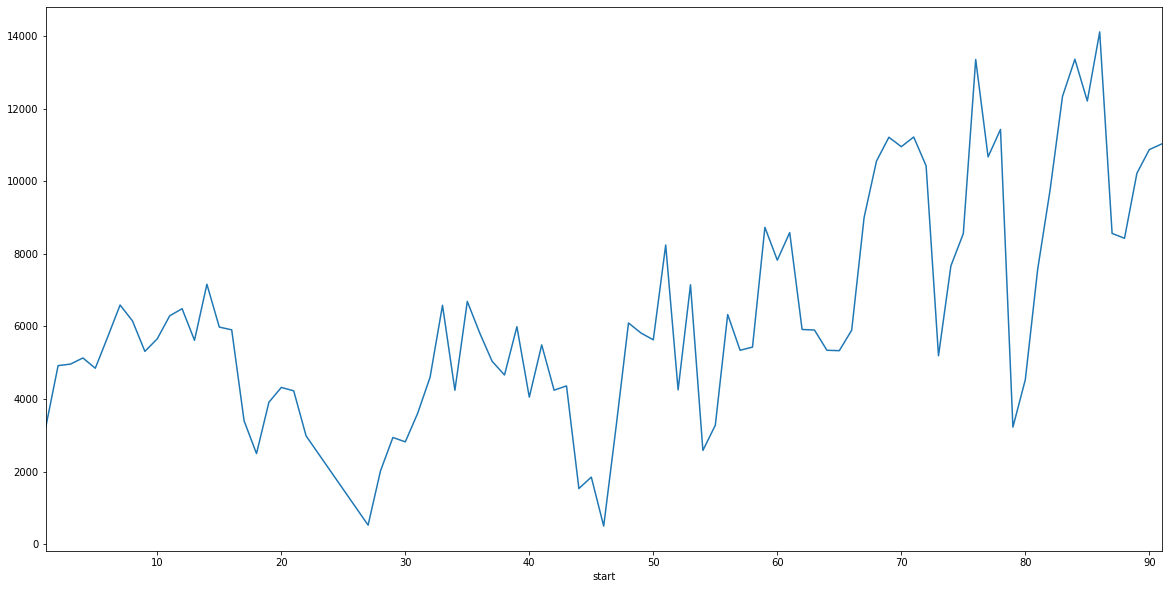

In [32]:
day_count.start.plot()

In [33]:
bikes.start.dt.dayofyear

0         91
1         91
2         91
3         91
4         91
          ..
552394     1
552395     1
552396     1
552397     1
552398     1
Name: start, Length: 552399, dtype: int64

In [34]:
bikes[bikes.start=="2016-01-10"].shape

(1, 15)

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

## 1. Using the **`day_hour_count`** dataframe create two dataframe `monday` and `saturday` that represent the data for those days. (hint: Monday is day=0)

In [35]:
day_hour_count  # inspect day_hour_count to determine how to manipulate

start,0,1,2,3,4,5,6
hour_of_day,,,,,,,
0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...
23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0


In [36]:
monday_df = day_hour_count[[0]]    # subset monday from day_hour_count and inspect
monday_df

start,0
hour_of_day,
0.0,21.0
0.1,39.0
0.2,31.0
0.3,26.0
0.4,19.0
...,...
23.5,36.0
23.6,37.0
23.7,30.0


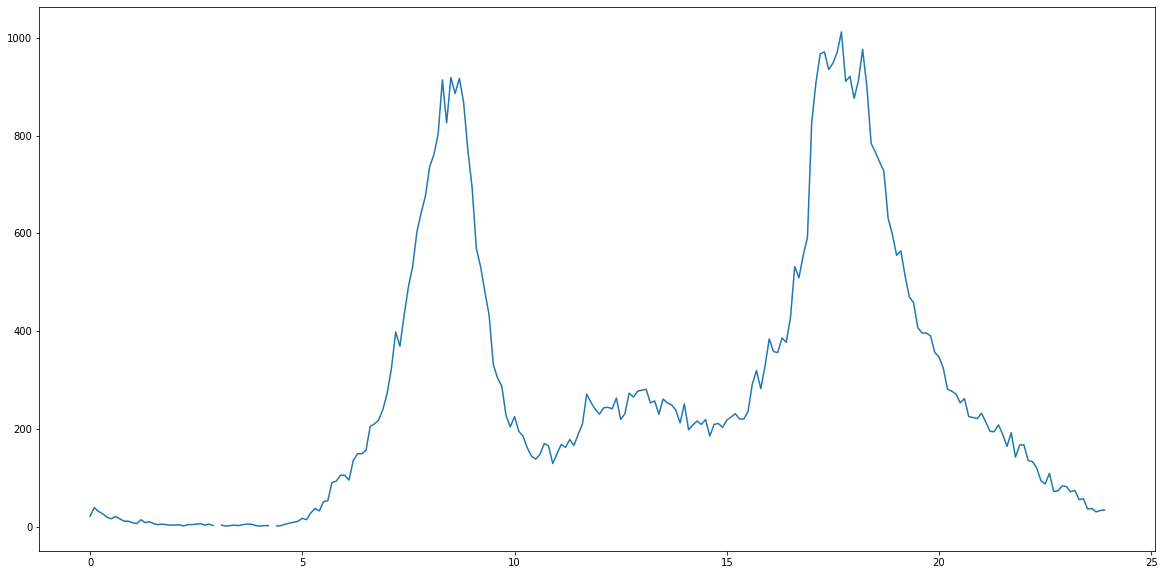

In [37]:
plt.plot(monday_df.index,monday_df) # visualize the Monday data to confirm it's what I expected

In [38]:
saturday_df = day_hour_count[[5]]  #repeat with Saturday data
saturday_df

start,5
hour_of_day,
0.0,89.0
0.1,87.0
0.2,98.0
0.3,99.0
0.4,98.0
...,...
23.5,93.0
23.6,95.0
23.7,105.0


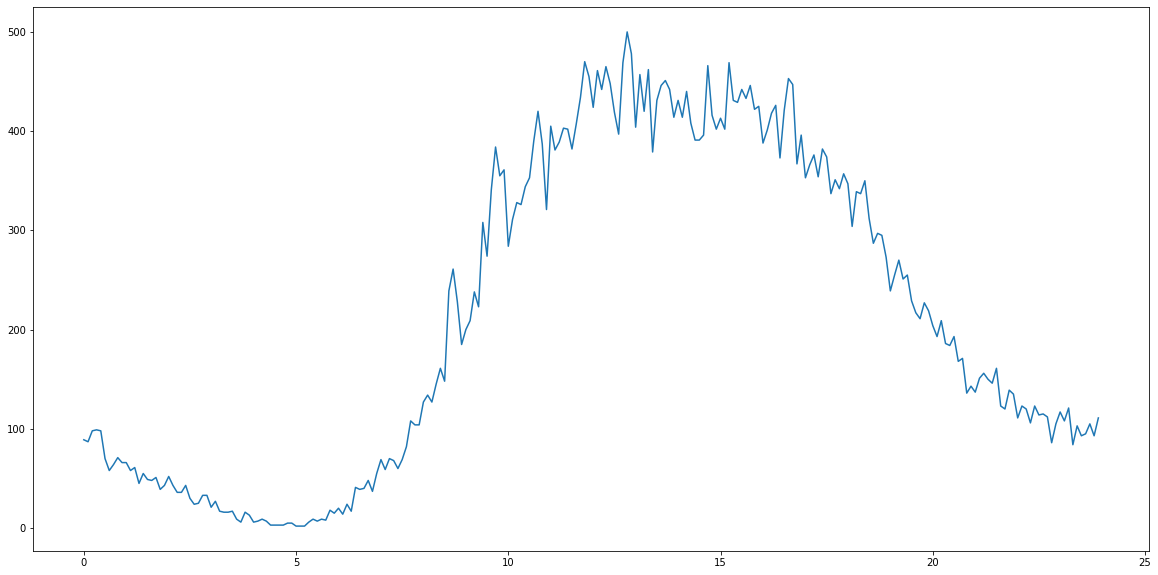

In [39]:
plt.plot(saturday_df.index,saturday_df)  # visualize Saturday data 


## 2a. Create 3 models fit to `monday` with varying polynomial degrees. Repeat for 

In [40]:
# Begin by importing appropriate model functions from sklearn

from sklearn import linear_model
linear = linear_model.LinearRegression()
from sklearn.preprocessing import PolynomialFeatures

In [91]:
# Arrange monday data so that it can be inputted into the sklearn models.

x_mon = monday_df.index.to_frame()
y_mon = monday_df

In [92]:
# Initially attempting to use the above x & y values in linear and polynomial models resulted
# in errors that indicated a data quality issue: infinite, NaN or overly large values in the data
# set. Following cells aim to diagnose and remove the corrupt data--given the data is not overly
# large, assume there are NaN/infinite values.

np.any(np.isnan(x_mon))

False

In [93]:
np.all(np.isfinite(x_mon))

True

In [94]:
# All of the data in x (the time of day) appears to be neither NaN nor infinite. 
# Turning to y (number of bike trip starts per time slot)

np.any(np.isnan(y_mon))

True

In [95]:
np.all(np.isfinite(y_mon))

False

In [84]:
# The culprit is found. Next turn to locating the specific rows and removing them from the dataset.

bool_series = pd.isnull(monday_df[0])
monday_df[bool_series]

start,0
hour_of_day,
3.0,NaN
4.3,NaN


In [99]:
# Looking back at the plot of Monday, this makes sense: small gaps are visible at 3.0 and 4.3. 
# Changing these to zero would skew the data, so will instead remove these rows from the data
# and then check to see if it worked.

y_mon_clean = y_mon.drop([3.0,4.3])
np.any(np.isnan(y_mon_clean))

False

In [101]:
# Perform similar drop operation on x so they still line up.

x_mon_clean = x_mon.drop([3.0,4.3])

In [203]:
# model #1, 6-degree polynomial

poly6 = PolynomialFeatures(degree=6)
x_mon_clean_6 = poly6.fit_transform(x_mon_clean)
linear.fit(x_mon_clean_6,y_mon_clean)
mon_coef6 = linear.coef_.T
mon_int6 = linear.intercept_

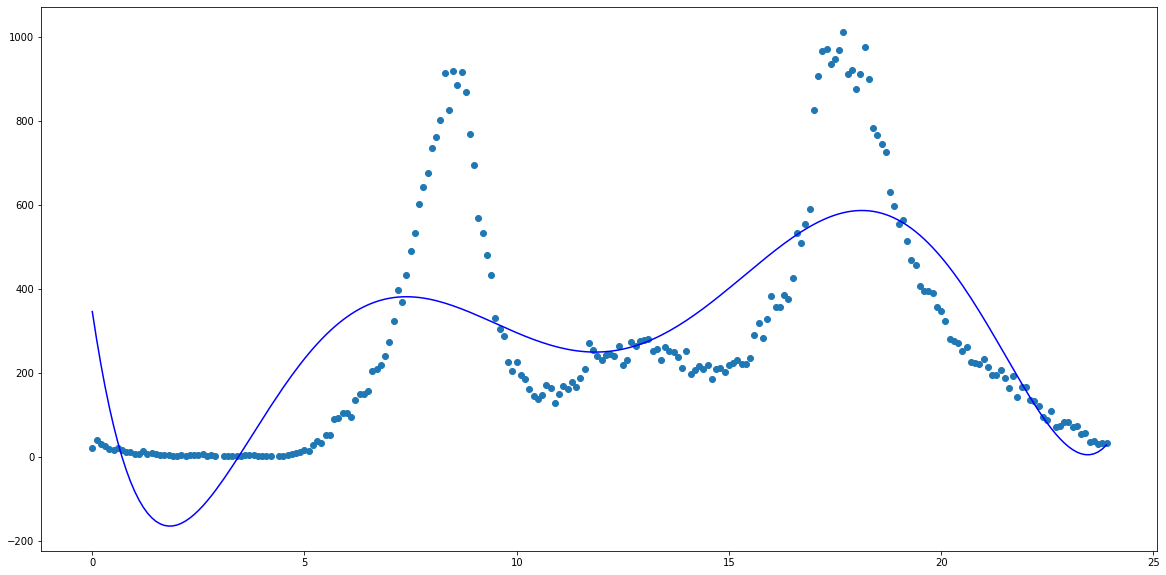

In [207]:
plt.scatter(x_mon_clean,y_mon_clean)
plt.plot(x_mon_clean, np.dot(x_mon_clean_6,mon_coef6) + mon_int6, c='b')

In [205]:
# model #2, a 10-degree polynomial

poly10 = PolynomialFeatures(degree=10)
x_mon_clean_10 = poly10.fit_transform(x_mon_clean)
linear.fit(x_mon_clean_10,y_mon_clean)
mon_coef10 = linear.coef_.T  
mon_int10 = linear.intercept_

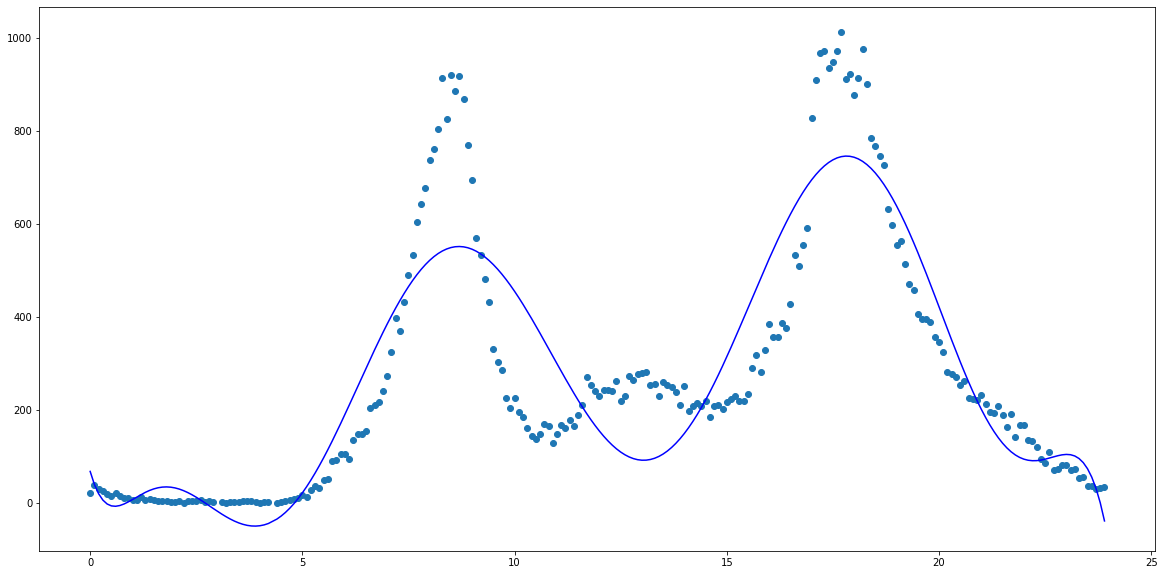

In [206]:
plt.scatter(x_mon_clean,y_mon_clean)
plt.plot(x_mon_clean, np.dot(x_mon_clean_10,mon_coef10) + mon_int10, c='b')

In [209]:
# model #3, a 15-degree polynomial

poly15 = PolynomialFeatures(degree=15)
x_mon_clean_15 = poly15.fit_transform(x_mon_clean)
linear.fit(x_mon_clean_15,y_mon_clean)
mon_coef15 = linear.coef_.T 
mon_int15 = linear.intercept_

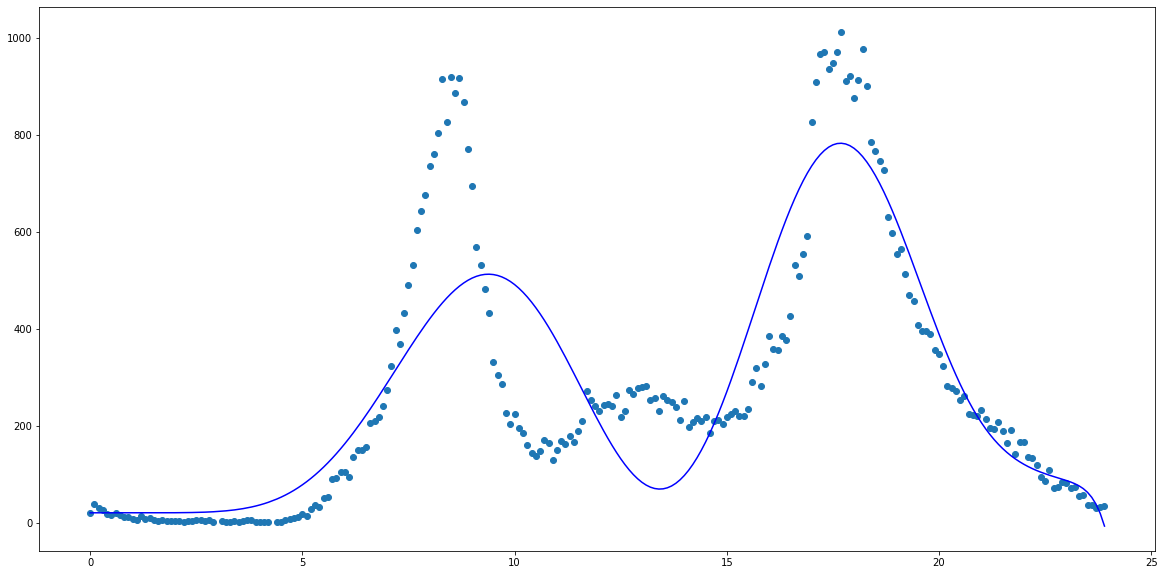

In [210]:
plt.scatter(x_mon_clean,y_mon_clean)
plt.plot(x_mon_clean, np.dot(x_mon_clean_15,mon_coef15) + mon_int15, c='b')

## 2b. Repeat `2a` for `saturday`

In [192]:
# Turning to the Saturday dataframe, break out the x and y values.

x_sat = saturday_df.index.to_frame()
y_sat = saturday_df

In [193]:
# Check to see if the dataframe contains any NaNs or infinite values.

np.any(np.isnan(x_sat))

False

In [194]:
np.any(np.isfinite(x_sat))

True

In [195]:
np.any(np.isnan(y_sat))

False

In [196]:
np.any(np.isfinite(y_sat))

True

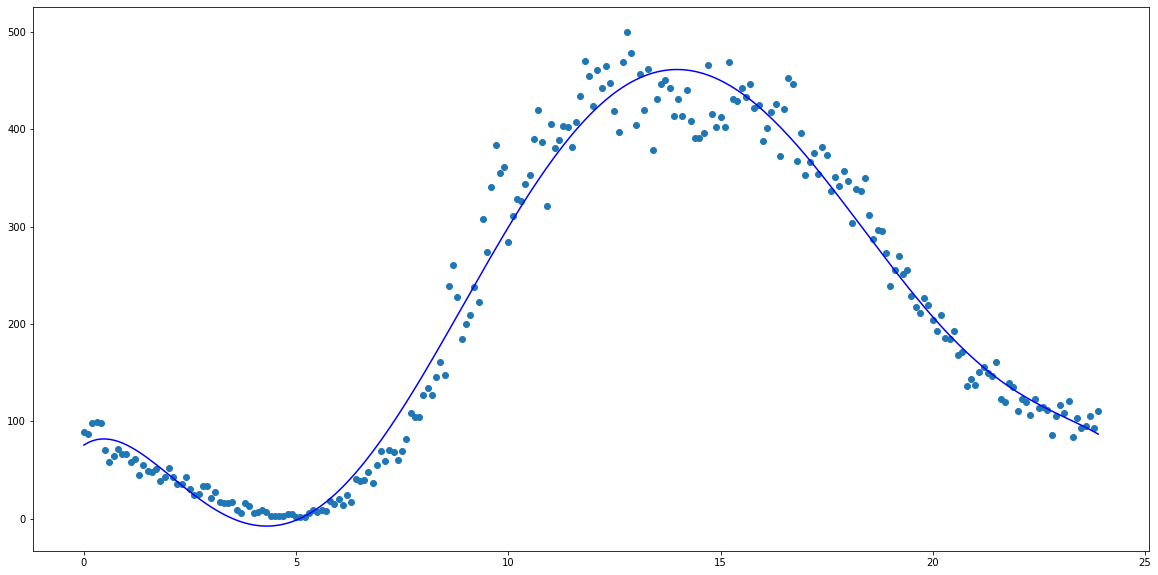

In [211]:
# Data looks good.

# model #1 for the Saturday dataset, a 6-degree polynomial

x_sat_6 = poly6.fit_transform(x_sat)
linear.fit(x_sat_6,y_sat)
sat_coef6 = linear.coef_.T  
sat_int6 = linear.intercept_
plt.scatter(x_sat,y_sat)
plt.plot(x_sat, np.dot(x_sat_6,sat_coef6) + sat_int6, c='b')

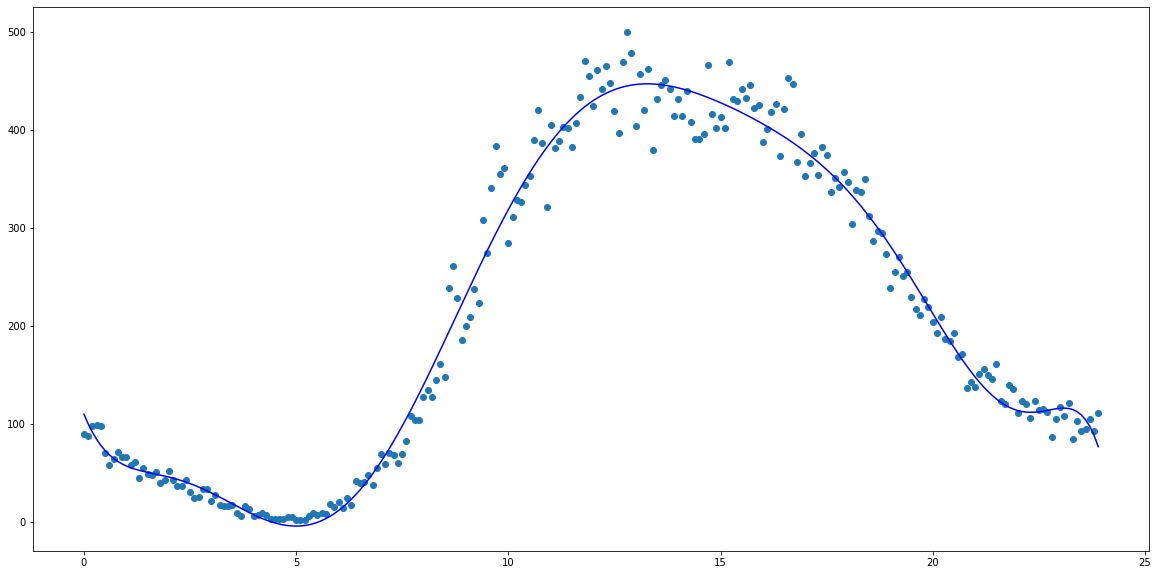

In [212]:
# model #2, a 10-degree polynomial

x_sat_10 = poly10.fit_transform(x_sat)
linear.fit(x_sat_10,y_sat)
sat_coef10 = linear.coef_.T 
sat_int10 = linear.intercept_
plt.scatter(x_sat,y_sat)
plt.plot(x_sat, np.dot(x_sat_10,sat_coef10) + sat_int10, c='b')

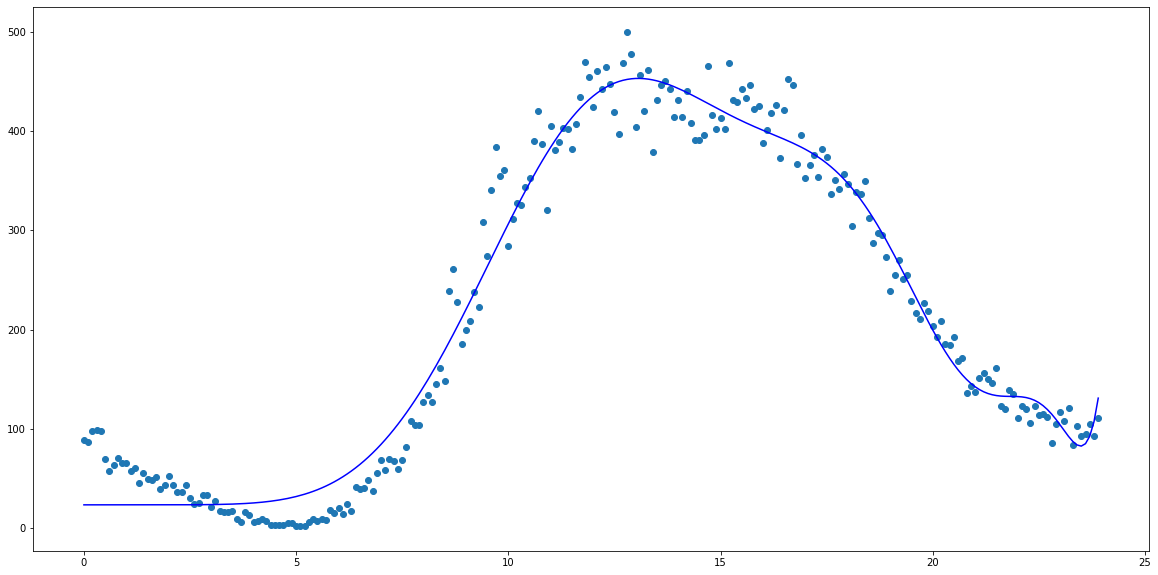

In [213]:
# model #3, a 15-degree polynomial

x_sat_15 = poly15.fit_transform(x_sat)
linear.fit(x_sat_15,y_sat)
sat_coef15 = linear.coef_.T 
sat_int15 = linear.intercept_
plt.scatter(x_sat,y_sat)
plt.plot(x_sat, np.dot(x_sat_15,sat_coef15) + sat_int15, c='b')

## 3. (for both `monday` and `saturday`) Choose one of the polynomial models and create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values


In [201]:
ridge_half = linear_model.Ridge(alpha=.5)
ridge_1 = linear_model.Ridge(alpha=1)
ridge_3 = linear_model.Ridge(alpha=3)

C:\Users\atoze\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.31829e-29): result may not be accurate.
  overwrite_a=True).T


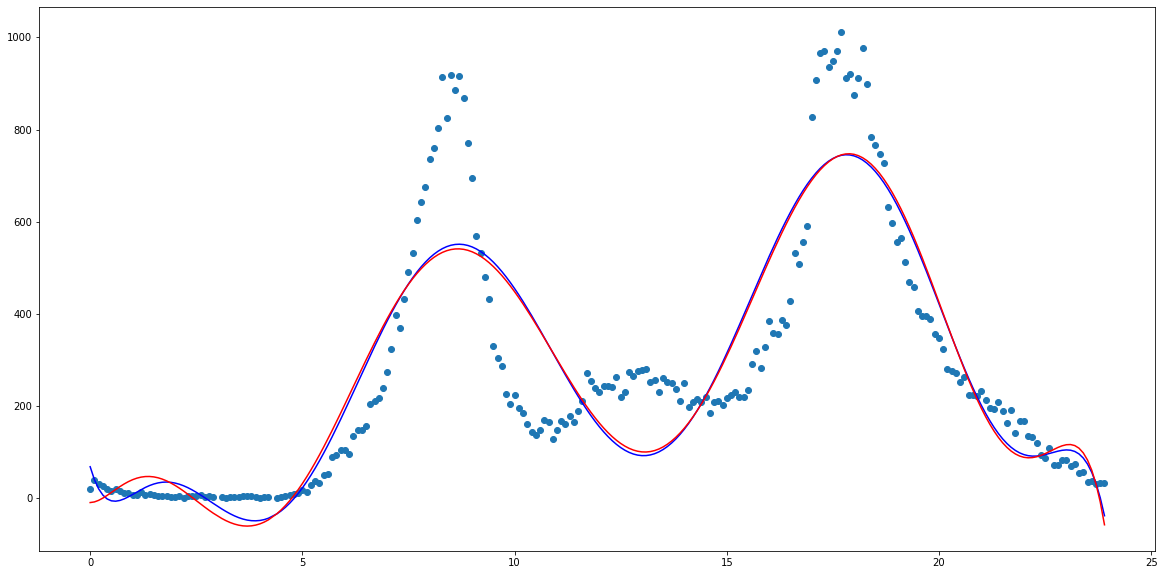

In [219]:
# Monday. Comparing the three polynomial models of the Monday dataset, I select the 10-degree
# polynomial, as its path seems to most closely match the actual data of bikeshare trips on Mondays.
# The 6-degree polynomial was inferior at capturing the fluctionations throughout the day, and
# the 15-degree polynomial appeared to place greater weight on the righthand side of the graph,
# shifting the first peak to the right. 

# The first ridge regression is performed with an alpha of 0.5:

ridge_half.fit(x_mon_clean_10,y_mon_clean)
plt.scatter(x_mon_clean,y_mon_clean)
plt.plot(x_mon_clean, np.dot(x_mon_clean_10,mon_coef10) + mon_int10, c='b')
plt.plot(x_mon_clean,np.dot(x_mon_clean_10,ridge_half.coef_.T)+ridge_half.intercept_,c='r')

C:\Users\atoze\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.63657e-29): result may not be accurate.
  overwrite_a=True).T


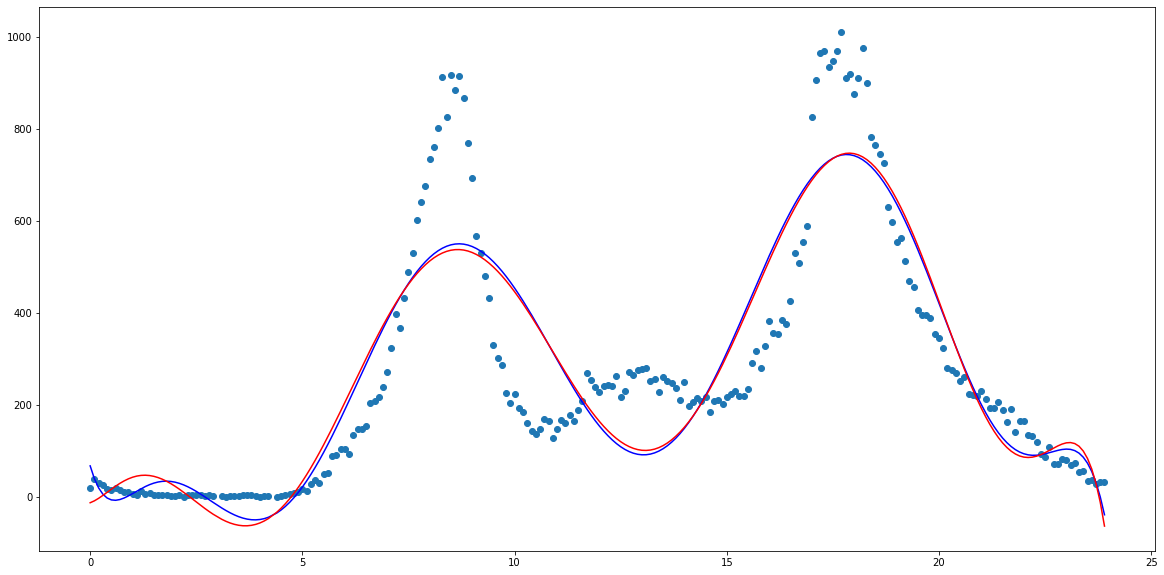

In [220]:
# The second Monday ridge regression is performed with an alpha of 1.0:

ridge_1.fit(x_mon_clean_10,y_mon_clean)
plt.scatter(x_mon_clean,y_mon_clean)
plt.plot(x_mon_clean, np.dot(x_mon_clean_10,mon_coef10) + mon_int10, c='b')
plt.plot(x_mon_clean,np.dot(x_mon_clean_10,ridge_1.coef_.T)+ridge_1.intercept_,c='r')

C:\Users\atoze\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.90972e-29): result may not be accurate.
  overwrite_a=True).T


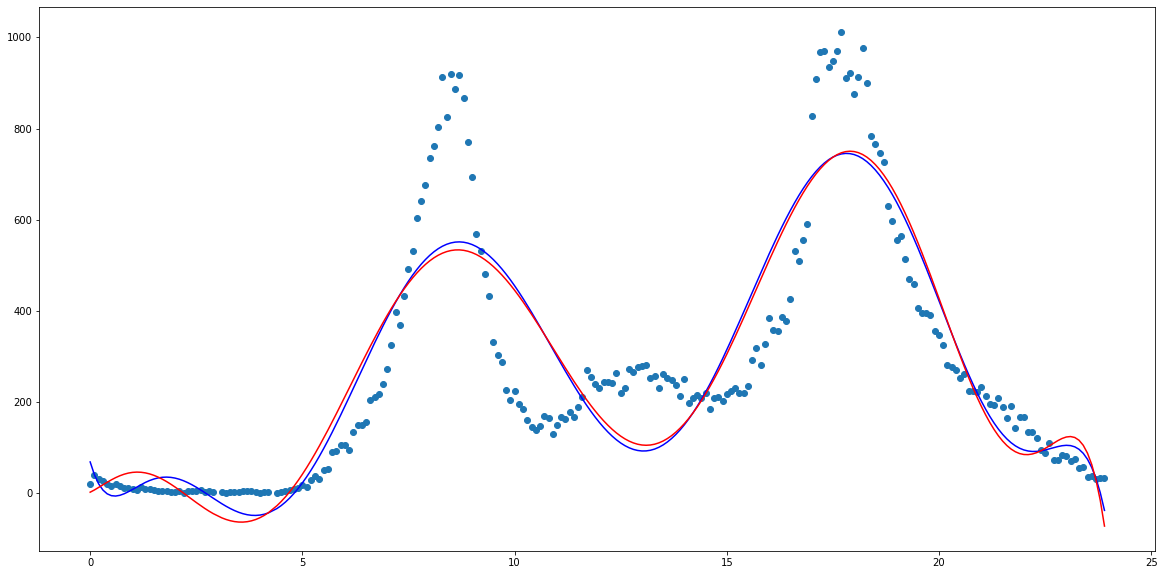

In [221]:
# The third ridge regression is performed with an alpha of 3:

ridge_3.fit(x_mon_clean_10,y_mon_clean)
plt.scatter(x_mon_clean,y_mon_clean)
plt.plot(x_mon_clean, np.dot(x_mon_clean_10,mon_coef10) + mon_int10, c='b')
plt.plot(x_mon_clean,np.dot(x_mon_clean_10,ridge_3.coef_.T)+ridge_3.intercept_,c='r')

In [ ]:
# Recommendation for Monday dataset: There appears to be little difference between the straight
# 10-degree polynomial regression using a linear model, and using the ridge linear model with
# varying levels of alpha. All of these models suffer from apparent overfitting at the high and
# low values--but since these values represent a loop and we are not seeking predictions prior to 
# or after this time scale, this particular overfitting is of little concern. All of these models
# also suffer from limitations in predicting accurately the three peaks of the data. Given that,
# I would recommend the 10-degree polynomial regression without the ridge regression model, as 
# the ridge model at all values seems to exacerbate some of the overfitting at the extremes.

C:\Users\atoze\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.90919e-19): result may not be accurate.
  overwrite_a=True).T


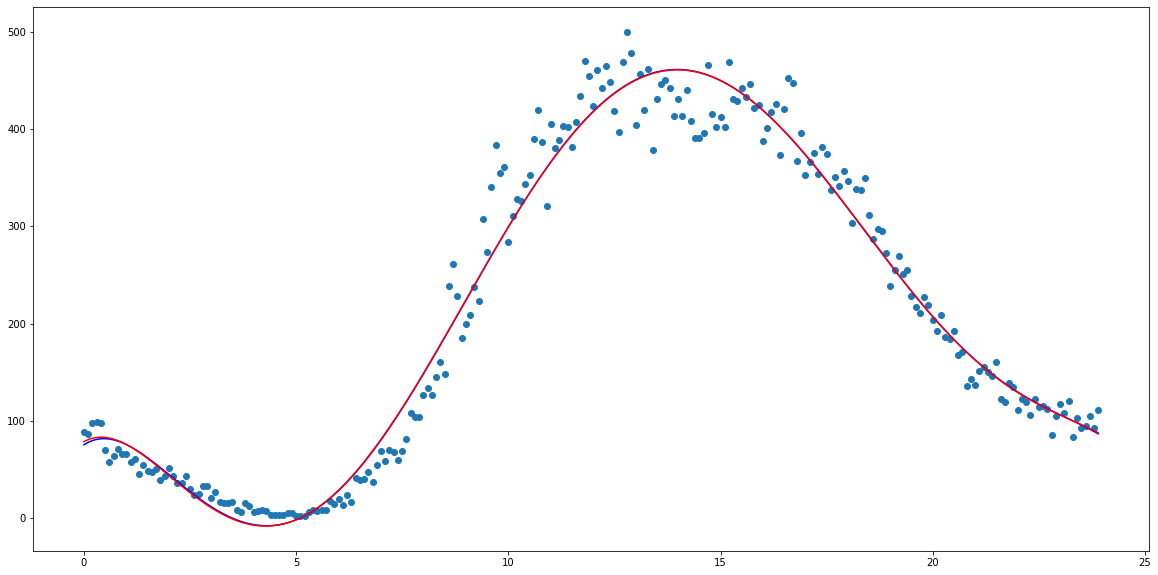

In [222]:
#Saturday. Comparing the three polynomial models of the Saturday bike share activity, I select
# the 6-degree polynomial. While all three models largely match the straightforward pattern of 
# the Saturday dataset, the 10-degree and 15-degree polynomials seem to suffer from some 
# overfitting, as they fluctuate excessively at the ends of the plot.

# The first ridge regression is performed with an alpha of 0.5

ridge_half.fit(x_sat_6,y_sat)
plt.scatter(x_sat,y_sat)
plt.plot(x_sat, np.dot(x_sat_6,sat_coef6) + sat_int6, c='b')
plt.plot(x_sat,np.dot(x_sat_6,ridge_half.coef_.T)+ridge_half.intercept_,c='r')

C:\Users\atoze\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98184e-18): result may not be accurate.
  overwrite_a=True).T


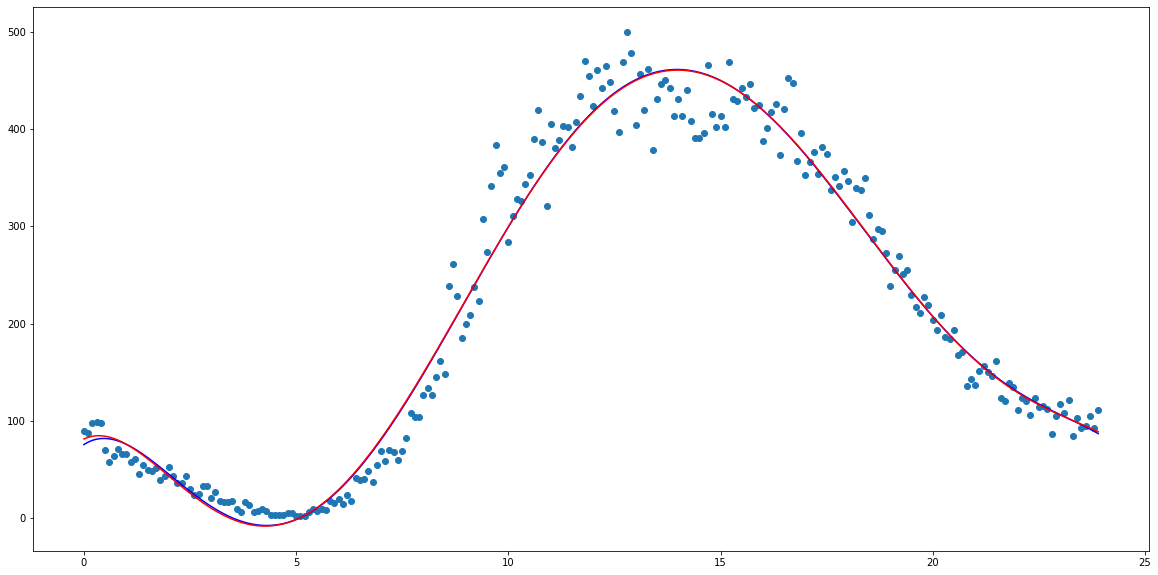

In [223]:
# The second Saturday ridge regression is performed with an alpha of 1

ridge_1.fit(x_sat_6,y_sat)
plt.scatter(x_sat,y_sat)
plt.plot(x_sat, np.dot(x_sat_6, sat_coef6) + sat_int6, c='b')
plt.plot(x_sat, np.dot(x_sat_6, ridge_1.coef_.T) + ridge_1.intercept_, c='r')

C:\Users\atoze\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.94551e-18): result may not be accurate.
  overwrite_a=True).T


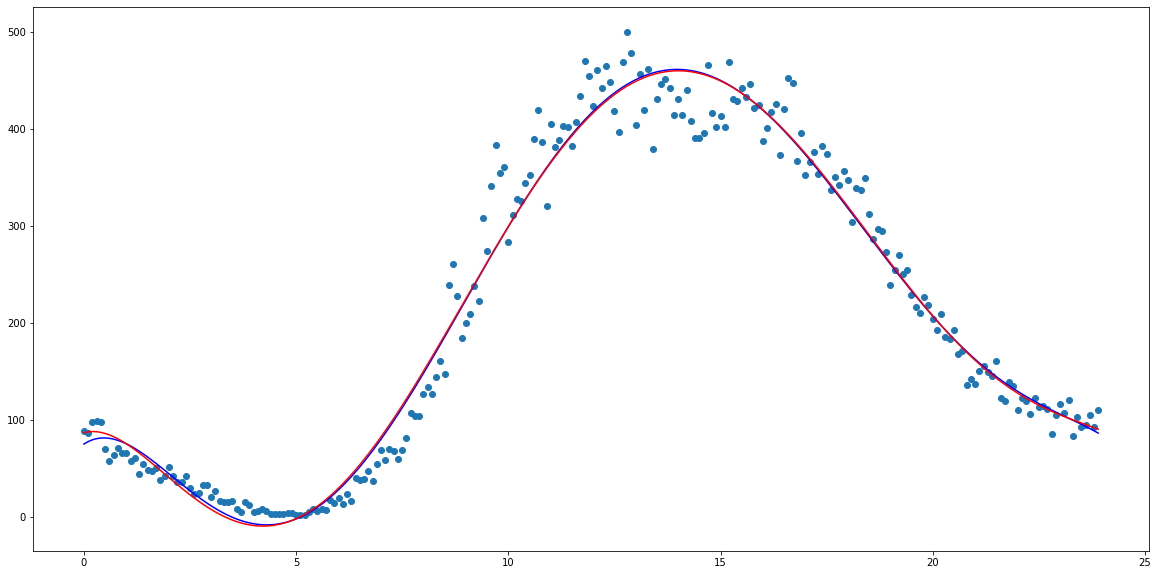

In [225]:
# The third Saturday ridge regression is performed with an alpha of 3

ridge_3.fit(x_sat_6,y_sat)
plt.scatter(x_sat,y_sat)
plt.plot(x_sat, np.dot(x_sat_6, sat_coef6) + sat_int6, c='b')
plt.plot(x_sat, np.dot(x_sat_6, ridge_3.coef_.T) + ridge_3.intercept_, c='r')

In [ ]:
#Recommendation: For the Saturday dataset, the difference between the 6-degree polynomial 
# regression model and the ridge models at various alpha values is miniscule. All of these models
# do a good job of capturing the pattern of the data. The final model--the ridge regression model
# with an alpha of 3--appears to slightly smooth out some apparent overfitting on the extreme left
# end of the plot, so I would select that model as the best fit.